In [12]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import datetime as dt

In [3]:
df = pd.read_csv("Resources/directing_percent.csv")
df

,movie_id,release_date,percent_female
0,5,1995-12-09,0.2
1,6,1993-10-15,0.0
2,11,1977-05-25,0.0
3,12,2003-05-30,0.0
4,13,1994-07-06,0.0
...,...,...,...
25764,462788,1966-12-02,0.0
25765,463800,2017-06-28,0.0
25766,464111,2017-07-12,0.0
25767,467731,1956-02-19,0.0


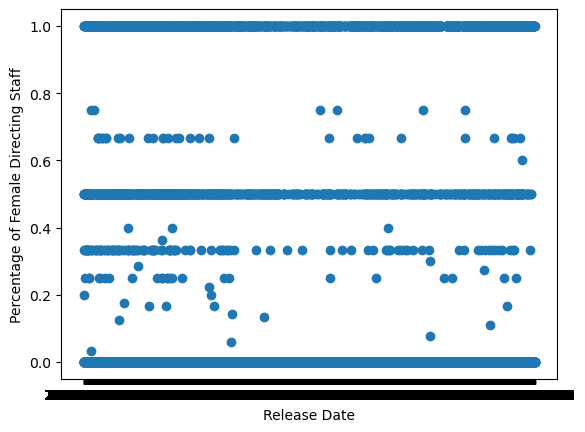

In [4]:
# TAKES FOREVER TO RUN!

plt.scatter(df.release_date, df.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Directing Staff')
plt.show()

In [14]:
#release date is a string
df.dtypes

movie_id            int64
release_date       object
percent_female    float64
dtype: object

In [15]:
# convert release date to useful format
# https://stackoverflow.com/questions/40217369/python-linear-regression-predict-by-date
# https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.toordinal.html

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date']=df['release_date'].map(dt.datetime.toordinal)

In [16]:
df.dtypes

movie_id            int64
release_date        int64
percent_female    float64
dtype: object

In [17]:
df

,movie_id,release_date,percent_female
0,5,728636,0.2
1,6,727851,0.0
2,11,721864,0.0
3,12,731365,0.0
4,13,728115,0.0
...,...,...,...
25764,462788,718037,0.0
25765,463800,736508,0.0
25766,464111,736522,0.0
25767,467731,714098,0.0


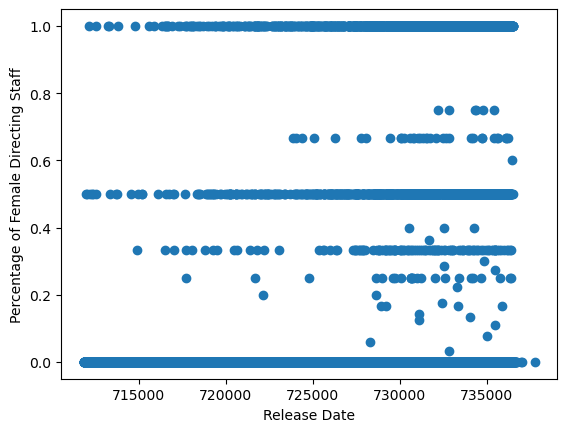

In [18]:
# same graph but with different data type for release_date
plt.scatter(df.release_date, df.percent_female)
plt.xlabel('Release Date')
plt.ylabel('Percentage of Female Directing Staff')
plt.show()

In [42]:
# The data in the df column must be reshaped into an array with shape (num_samples, num_features)
# https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
X = df.release_date.values.reshape(-1, 1)
X

array([[728636],
       [727851],
       [721864],
       ...,
       [736522],
       [714098],
       [724490]], dtype=int64)

In [43]:
X.shape

(25769, 1)

In [30]:
# # Create our features
# X = df.copy()
# X = X.drop("release_date", axis=1)
# X = X.drop("movie_id", axis=1)
# X

,percent_female
0,0.2
1,0.0
2,0.0
3,0.0
4,0.0
...,...
25764,0.0
25765,0.0
25766,0.0
25767,0.0


In [44]:
# Create our target
y = df.percent_female
y

0        0.2
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
25764    0.0
25765    0.0
25766    0.0
25767    0.0
25768    0.0
Name: percent_female, Length: 25769, dtype: float64

In [32]:
len(X)

25769

In [33]:
len(y)

25769

In [45]:
model = LinearRegression()

In [46]:
model.fit(X, y)

LinearRegression()

In [47]:
y_pred = model.predict(X)
print(y_pred.shape)

(25769,)


In [37]:
len(y_pred)

25769

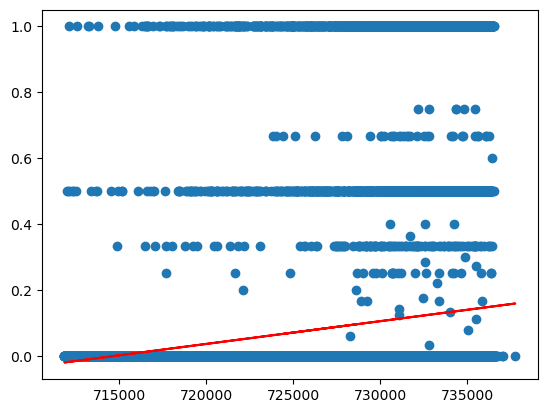

In [48]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [39]:
# The slope
# The y-intercept
print(model.coef_)
print(model.intercept_)

[1.]
1.4849232954361469e-15
